In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, r2_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.feature_selection import RFE

In [19]:
df = pd.read_csv('train.csv')


In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
originalData = df.copy()

In [22]:
round(df.isna().sum()/len(df)*100,2)


,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


-Cabin memiliki 77% missing value di dalam column nya, Age memiliki 19,8% missing value di dalam column nya, dan Embarker memiliki 0.22% missing value di dalam column nya.

-Saya akan menghapus 'Cabin' karena saya menerapkan aturan column dengan missing values > 50% akan didrop karena melakukan impute data akan membuat data yang terlalu 'buatan' untuk menghindari data yang tidak relevan, lainnya yang memiliki missing values akan saya lakukan pengisian data

-Data Umur akan saya isi dengan median dan Embarked akan saya isi dengan modus


-Saya isi dengan median untuk umur karena jika data tidak terdistribusi secara normal (misalnya, data yang skewed atau memiliki distribusi yang miring), median memberikan estimasi yang lebih akurat dari pusat data dibandingkan dengan mean.



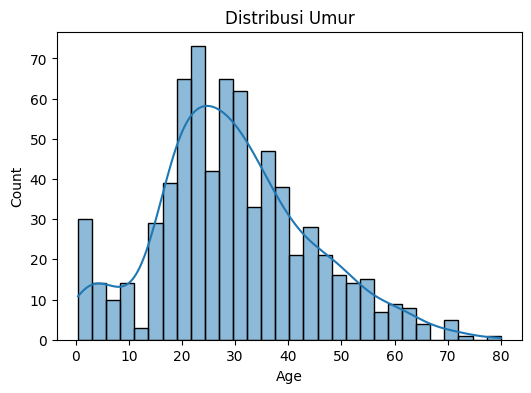

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribusi Umur")
plt.show()

In [24]:
a = round(df.isna().sum()/len(df)*100,2)

for col in df.columns:
    if a[col] > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
                df[col] = df[col].fillna(df[col].median())

In [25]:
df.drop(['Cabin'], axis=1, inplace = True)

In [26]:
round(df.isna().sum()/len(df)*100,2)

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


Sudah tidak ada missing value

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

Saya menghapus kedua column:


-PassengerId:
Tidak Mengandung Informasi Prediktif: PassengerId adalah pengidentifikasi unik yang tidak memberikan informasi relevan untuk memprediksi keselamatan penumpang.



-Name:
Tidak Relevan untuk Prediksi: Nama penumpang tidak memberikan informasi langsung yang berguna untuk memprediksi apakah mereka selamat atau tidak.


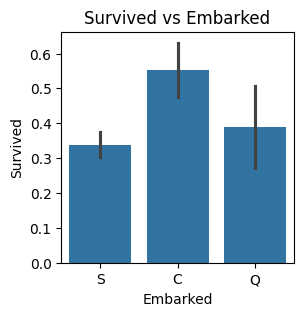

In [29]:
plt.figure(figsize=(3,3))
sns.barplot(data=df, x='Embarked', y='Survived')
plt.title('Survived vs Embarked')
plt.show()

Barplot ini menunjukkan bahwa pelabuhan keberangkatan memiliki pengaruh pada tingkat kelangsungan hidup penumpang Titanic. Penumpang yang naik dari Pelabuhan C memiliki peluang yang lebih besar untuk selamat dibandingkan penumpang dari Pelabuhan S atau Q

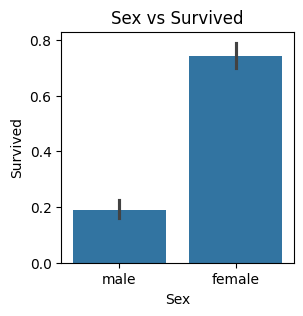

In [30]:
plt.figure(figsize=(3,3))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Sex vs Survived')
plt.show()

Barplot ini dengan jelas menunjukkan bahwa jenis kelamin adalah pengaruh kuat penentu dalam kelangsungan hidup di Titanic. Perempuan memiliki peluang yang jauh lebih tinggi untuk selamat dibandingkan laki-laki, 'mungkin' (hanya asumsi) ada beberapa hal yang tersembunyi terjadi seperti Perempuan lebih taat dengan peraturan sehingga membuat tingkat Survived yang lebih tinggi.

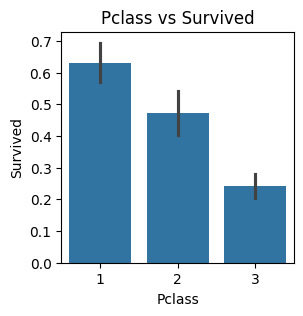

In [31]:
plt.figure(figsize=(3,3))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Pclass vs Survived')
plt.show()

Barplot ini dengan jelas menunjukkan bahwa kelas penumpang adalah memiliki pengaruh yang cukup kuat dalam kelangsungan hidup di Titanic. Penumpang kelas atas memiliki peluang yang jauh lebih tinggi untuk selamat dibandingkan penumpang kelas bawah.

In [32]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


Data yang selamat dan tidak selamat tidak seimbang (imbalance) untuk mendukung model bekerja lebih baik kita perlu melakukan Oversampling atau Undersampling untuk menyeimbangkan data

In [33]:
LE = LabelEncoder()
#Sex bisa kita pake label encoder karena ini bukan dijadiin sebuah nilai, ini hanya buat penanda dia male atau female
df['Sex'] = LE.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,False,True
1,1,1,0,38.0,1,0,PC 17599,71.2833,False,False


Melakukan encode pada Embarked karena model bekerja dengan data numerik

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    875 non-null    int64  
 1   Pclass      875 non-null    int64  
 2   Sex         875 non-null    int64  
 3   Age         875 non-null    float64
 4   SibSp       875 non-null    int64  
 5   Parch       875 non-null    int64  
 6   Ticket      875 non-null    object 
 7   Fare        875 non-null    float64
 8   Embarked_Q  875 non-null    bool   
 9   Embarked_S  875 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 63.2+ KB


In [36]:
df.drop(['Ticket'], axis=1, inplace=True)

Informasi yang mungkin relevan dari tiket (seperti kelas penumpang atau harga tiket) sudah tersedia di kolom lain (Pclass, Fare).
Jika model sudah memiliki informasi ini, kolom "Ticket" mungkin tidak memberikan nilai tambah yang signifikan. Sehingga, kita dapat menghapus column ticket.

<Axes: >

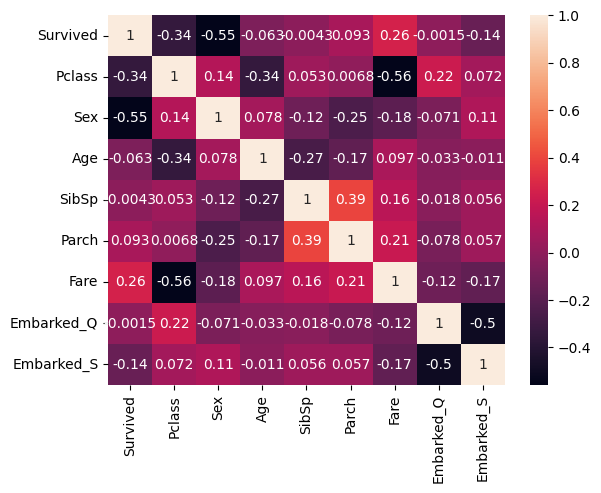

In [37]:
sns.heatmap(df.corr(), annot=True)

Heatmap korelasi ini memberikan gambaran tentang hubungan antar fitur dalam dataset Titanic. Korelasi negatif antara Pclass dan Survived menunjukkan bahwa penumpang kelas atas memiliki peluang bertahan hidup yang lebih tinggi. Demikian pula, korelasi positif antara Fare dan Survived mengindikasikan bahwa penumpang yang membayar lebih untuk tiket mereka cenderung memiliki peluang bertahan hidup yang lebih besar.


Fitur-fitur seperti SibSp dan Parch menunjukkan korelasi satu sama lain, mencerminkan ukuran keluarga. Usia tampaknya memiliki korelasi yang lemah dengan kelangsungan hidup. Insight ini dapat membantu dalam memilih fitur dan membangun model prediksi yang lebih akurat untuk masalah Titanic.


In [38]:
X = df.drop(columns = 'Survived')
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Saya melakukan penyeimbangan data dengan SMOTE karena jumlah data yang sudah sedikit atau dataset kecil, jadi tidak ingin mengurangi data dengan undersampling.

In [39]:
y_train_balanced.value_counts(normalize=True)

,proportion
Survived,
0,0.5
1,0.5


Data sudah balanced

In [40]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X = X.astype(float)

model = LogisticRegression(max_iter=500, solver='liblinear')
selector = RFE(model, n_features_to_select=5)
X_new = selector.fit_transform(X, y)

selected_columns = X.columns[selector.support_].tolist()
print("Fitur yang dipilih:", selected_columns)

Fitur yang dipilih: ['Pclass', 'Sex', 'SibSp', 'Embarked_Q', 'Embarked_S']


Saya melakukan Feature Selection dan menghasilkan fitur fitur yang memiliki pengaruh kuat berdasarkan hasil Feature Selection adalah ['Pclass', 'Sex', 'SibSp', 'Embarked_Q', 'Embarked_S']

In [41]:
df.drop(columns=['Fare', 'Parch'], inplace=True)

Saya mengikuti hasil dari Feature Selectionnya, sehingga saya menghapus column lainnya

In [42]:
scaler = RobustScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

RobustScaler dipilih karena dataset Titanic cenderung memiliki outlier dan data yang tidak terdistribusi normal. RobustScaler menggunakan median dan IQR, membuatnya tahan terhadap outlier, yang penting setelah SMOTE mungkin memperkenalkan variabilitas baru. Ini menjaga informasi relevan dan meningkatkan kinerja model dengan menangani data yang miring tanpa asumsi distribusi normal.










In [82]:
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
}

param_grids = {
    "GaussianNB": {'var_smoothing': np.logspace(-9, 0, 50)},
    "BernoulliNB": {'alpha': np.linspace(0.1, 1.0, 10)},
}

Membandingkan kedua model naive bayes untuk mencari yang terbaik untuk dipakai saat ini


In [90]:
results = []

for name, model in models.items():
    try:
        print(f"Training {name}...")

        search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=1)
        search.fit(X_train_balanced_scaled, y_train_balanced)


        best_model = search.best_estimator_


        y_pred = best_model.predict(X_test_scaled)
        y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        results.append({
            "Model": name,
            "Best Params": search.best_params_,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

    except Exception as e:
        print(f"Model {name} error: {e}")

df_results = pd.DataFrame(results)
print("\nHasil Perbandingan Model Naive Bayes:")
print(df_results)



Training GaussianNB...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training BernoulliNB...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Hasil Perbandingan Model Naive Bayes:
         Model                              Best Params  Accuracy  Precision  \
0   GaussianNB  {'var_smoothing': 0.002682695795279727}  0.741445   0.700000   
1  BernoulliNB                           {'alpha': 0.1}  0.593156   0.503448   

     Recall  F1 Score   ROC-AUC  
0  0.648148  0.673077  0.775836  
1  0.675926  0.577075  0.663381  



Hasil:

GaussianNB lebih baik dari BernoulliNB dalam akurasi, presisi, F1 score, dan ROC-AUC.

GaussianNB adalah model Naive Bayes yang lebih efektif untuk data ini.

In [71]:
best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_params = df_results.loc[df_results['Accuracy'].idxmax(), 'Best Params']
print(f"\nModel terbaik berdasarkan Accuracy: {best_model_name}")
print(f"Parameter terbaik: {best_params}")


Model terbaik berdasarkan Accuracy: GaussianNB
Parameter terbaik: {'var_smoothing': 0.002682695795279727}


In [72]:
final_model = models[best_model_name]
final_model.set_params(**best_params)
final_model.fit(X_train_balanced_scaled, y_train_balanced)

GaussianNB(var_smoothing=0.002682695795279727)

In [73]:
y_pred = final_model.predict(X_test_scaled)
y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]

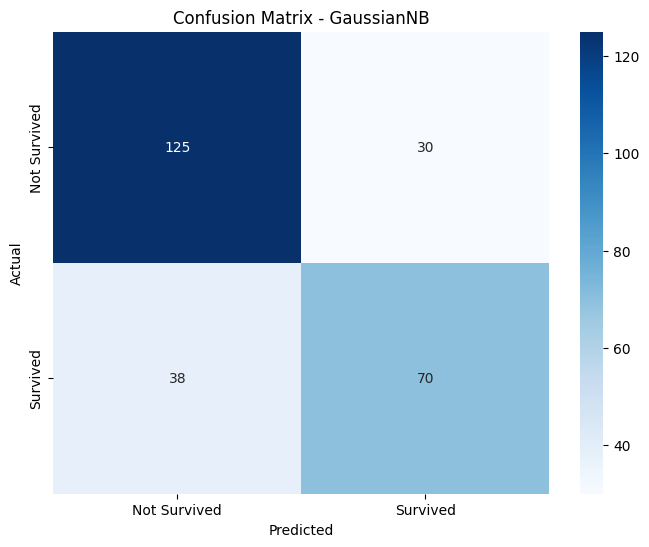

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

Confusion matrix menunjukkan model memprediksi 125 penumpang tidak selamat dengan benar dan 70 penumpang selamat dengan benar. Namun, ada 30 false positives (salah prediksi selamat) dan 38 false negatives (salah prediksi tidak selamat), menunjukkan model cenderung kurang akurat dalam memprediksi penumpang yang selamat.

In [75]:
print(f"Classification Report - {best_model_name}:\n", classification_report(y_test, y_pred))

Classification Report - GaussianNB:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       155
           1       0.70      0.65      0.67       108

    accuracy                           0.74       263
   macro avg       0.73      0.73      0.73       263
weighted avg       0.74      0.74      0.74       263



Laporan klasifikasi ini mengevaluasi kinerja model dalam memprediksi dua kelas (0 dan 1). Untuk kelas 0, model mencapai presisi 0.77, recall 0.81, dan F1-score 0.79, menunjukkan kinerja yang cukup baik dalam memprediksi kelas ini. Untuk kelas 1, model memiliki presisi 0.70, recall 0.65, dan F1-score 0.67, menunjukkan kinerja yang sedikit lebih rendah. Akurasi keseluruhan model adalah 0.74, yang berarti model benar memprediksi 74% dari total prediksi. Nilai rata-rata makro (macro avg) dan rata-rata tertimbang (weighted avg) juga menunjukkan kinerja yang stabil di sekitar 0.74. Secara keseluruhan, model menunjukkan kinerja yang cukup baik, tetapi ada ruang untuk perbaikan, terutama dalam meningkatkan recall untuk kelas 1.

In [96]:
cv_scores = cross_val_score(final_model, X_train_balanced_scaled, y_train_balanced, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {round(cv_scores.mean()*100,1)}%")

Cross-Validation Scores: [0.77272727 0.75324675 0.82467532 0.90196078 0.84313725]
Mean Cross-Validation Score: 81.9%


Hasil cross-validation menunjukkan bahwa model best_model memiliki kinerja yang cukup baik, dengan rata-rata akurasi sekitar 81.9%. Ini menunjukkan bahwa model memiliki kemampuan generalisasi yang baik dan cenderung bekerja dengan baik pada data baru yang tidak terlihat.


In [92]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

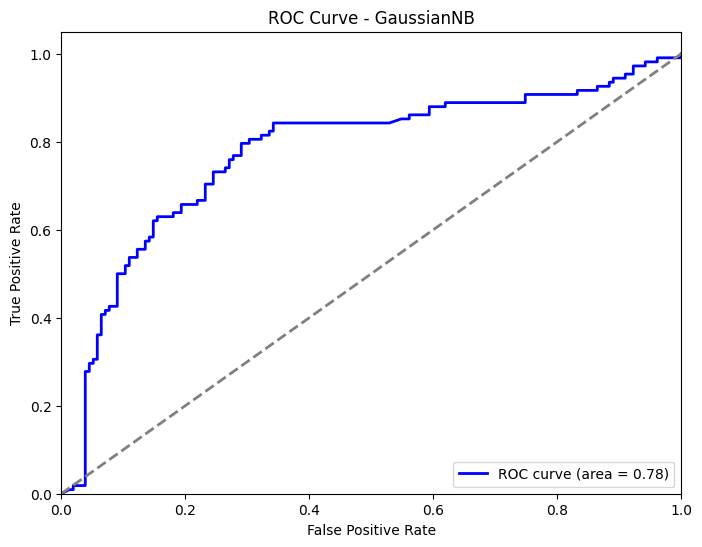

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.show()

Grafik ROC Curve untuk model GaussianNB menunjukkan performa klasifikasi biner yang baik, dengan area di bawah kurva (AUC) sebesar 0.78, yang berarti model ini memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif. Kurva yang berada di atas garis diagonal menunjukkan bahwa model ini lebih baik daripada tebakan acak, dan bentuk kurva yang curam di awal mengindikasikan kemampuan model dalam mengidentifikasi kasus positif dengan tingkat false positive yang rendah. Secara keseluruhan, grafik ini memvalidasi efektivitas model GaussianNB dalam tugas klasifikasi ini.